<a href="https://colab.research.google.com/github/hany606/LCT_Spring20IU/blob/master/Lab1_Additional_Points.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Info

Name: Hany Hamed

Group: BS18-06


## Note: 
  In order to run successfully, you have to run the first coding cell in the begining as it will have the defintion for the class and the importing of the libraries


## Change DE to TF (General)

Steps:

  (1) Change DE to State space through changing of variables, to make the system coupled in order to be able to represent in matrix form.
  
  Where n is the order of the DE, the change of variables will be in the following way

  $x_i = x^{(i-1)}$  $such\ that, \ 0 < i < n $

  $ x = \begin{bmatrix} x_1 \\  x_2 \\ . \\ . \\ x_{n}\end{bmatrix}$ 
  $= \begin{bmatrix} x \\  \dot x \\ . \\ . \\ x^{n-1}\end{bmatrix}$


$ \dot x = \begin{bmatrix} x_2 \\  x_3 \\ . \\ . \\ x^{n}\end{bmatrix}$ 
  $= \begin{bmatrix} \dot x \\  \ddot x \\ . \\ . \\ x^{n}\end{bmatrix}$


  (2) Get the system in form of state space model as follows 
  
  - Model:
   $\dot x = A x + Bu$
  
  such that u is function of t (the independent variable)

  - Output:
   $y = Cx$

(3) Calculate $W(p) = C(Ip-A)^{-1} B$, notice that if the system is SISO B is vector as well as C. "p" is considered as "s" variable in frequency domain and I is the identity matrix, moreover, $^{-1}$ means inverse of the matrix.




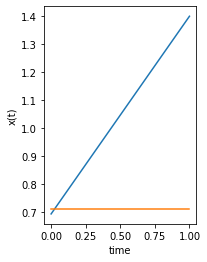

In [5]:
# General Class

import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt



n = 2  # order of the DE


class StateSpaceModel:
  def __init__(self, order=None, coefficients=None, u=None, A=None, B=None, C=None, D=None):
    self.n = order if coefficients is None else len(coefficients[0])-1
    self.A = np.zeros((self.n,self.n))
    self.A[:(self.n-1), 1:] = np.identity(self.n-1)
    self.B = np.zeros(self.n)
    self.C = np.zeros(self.n)
    self.C = np.zeros(self.n)
    
    
    if(A is not None):
      self.setA(A)
    if(B is not None):
      self.setB(B)
    if(C is not None):
      self.setC(C)
    if(D is not None):
      self.setD(D)
    # Cofficients: [coefficients of the polynomial, cofficients of the polynomial of the output, coefficient of t-term]
    if(coefficients is not None):
      c = np.flip(-np.array(coefficients[0][1:])/coefficients[0][0])
      self.setA(c)
      # print(self.A)
      self.setB(1/coefficients[0][0])
      # print(self.B)
      self.setC(np.array(coefficients[1]))
      self.setD(coefficients[2])

    self.u = u if u is not None else None

    # print(self.A, self.B, self.C, self.u)
    
  def getOrder(self):
    return self.n

  def setA(self, last_row_A):
    self.A[n-1,:] = last_row_A
  
  def setB(self, c):
    self.B[n-1] = c

  def setC(self, C):
    self.C = C

  def setD(self, D):
    self.D = D

  def setU(self, f_t):
    self.u = f_t

  def getStateSpace(self, x, t):
    ret = self.A.dot(x) + self.B.dot(self.u(t))
    return ret

  def getTransferFunction(self, p):
    aux = (np.identity(self.n)*p-self.A)
    ret = self.C.dot(np.linalg.inv(aux)).dot(self.B) + self.D
    return ret


# u is function of t
def functionU(t):
  return t+8

def solve(ssm, x0=None, t=None):
  order = ssm.getOrder()
  initial_conditions = x0 if x0 is not None else np.random.rand(order) 
  time = t if t is not None else np.linspace(0, 1, 1000)
  solution = odeint(ssm.getStateSpace, initial_conditions, time)
  if(t is None):
      return solution, time
  return solution 
  

def plot(solution, time):
  plt.subplot(121)
  plt.plot(time, solution)
  plt.xlabel('time')
  plt.ylabel('x(t)')
  plt.show()  

# ssm = StateSpaceModel(n, functionU)
ssm = StateSpaceModel(order=n, u=lambda t: np.sin(t))
solution, time = solve(ssm)
plot(solution, time)



# Solutions:




(a)



[[ 0.          1.        ]
 [ 0.         -0.66666667]] [0.         0.33333333] [3 0] <function <lambda> at 0x7f976d814950>


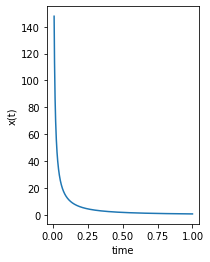

[[ 0.          1.        ]
 [ 0.         -0.66666667]] [0.         0.33333333] [3 0] <function <lambda> at 0x7f976cf561e0>


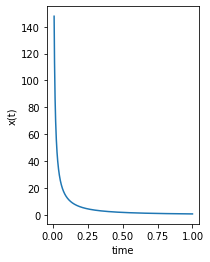

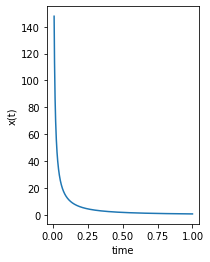

In [0]:
SSM = {}
TF = {}
SSM['a'] = StateSpaceModel(order=2, u=lambda t: 2*t+1, A=[0, -2/3], B=1/3, C=np.array([3,0]))
TF['a'] = SSM['a'].getTransferFunction

tf_plot = []
time = np.linspace(0.01, 1, 1000)
for i in time:
  tf_plot.append(TF['a'](i))

plot(tf_plot, time)

SSM['a'] = StateSpaceModel(coefficients=np.array([[3,2,0],[3,0]]), u=lambda t: 2*t+1)
TF['a'] = SSM['a'].getTransferFunction

tf_plot = []
time = np.linspace(0.01, 1, 1000)
for i in time:
  tf_plot.append(TF['a'](i))

plot(tf_plot, time)

# test for q.a with the answer that I calculated
test = []
for i in time:
  test.append(3/(i*(3*i+2)))
plot(test,time)

a 	-->	Success
b 	-->	Success
c 	-->	Failed
d 	-->	Success
e 	-->	Success
f 	-->	Success
g 	-->	Success
h 	-->	Success
n 	-->	Success
q 	-->	Success
Plot of  a


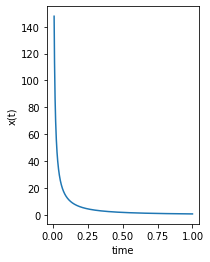

----------------------------------
Plot of  b


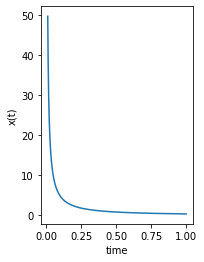

----------------------------------
Plot of  d


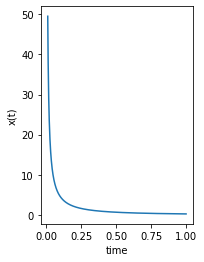

----------------------------------
Plot of  e


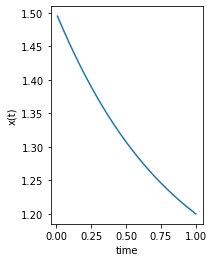

----------------------------------
Plot of  f


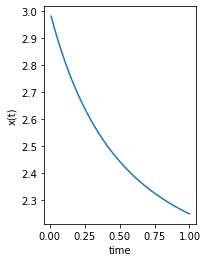

----------------------------------
Plot of  g


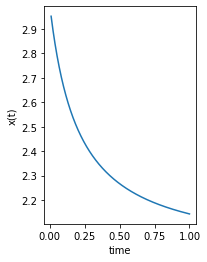

----------------------------------
Plot of  h


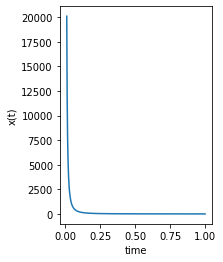

----------------------------------
Plot of  n


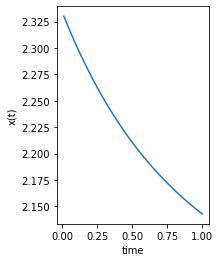

----------------------------------
Plot of  q


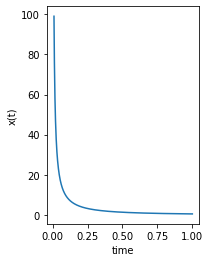

----------------------------------


In [17]:
# [Coefficients of the polynomial], function(t) == u, polynomial of the output, coefficient of t-term]
equations = [[[3,2,0],lambda t: 2*t+1,[3,0], 0], #a
             [[1,2,0],lambda t: t+8,[1,0], 0],   #b
             [[1,-1,0],lambda t: t-4,[1,2], 0],  #c
             [[2,2,0],lambda t: 2*t+9,[1,0], 0], #d
             [[1,2,2],lambda t: t+5,[1,0], 1], #e
             [[1,2,1],lambda t: t+5,[1,0], 2], #f
             [[1,5,1],lambda t: t,[1,0], 2], #g
             [[1,0,0],lambda t: t+3,[2,1], 0], #h
             [[1,3,3],lambda t: t,[1,0], 2], #n
             [[3,3,0],lambda t: 2*t+1,[3,0], 0], #q
             ]

questions_list = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'n', 'q']
coefficients = {}
transfer_functions = {}
state_space_models = {}
tf_plot = {}
x_axis = np.linspace(0.01, 1, 1000)


for i,q in enumerate(questions_list):
  print(q, "\t-->\t", end="")
  if(q == 'c'):
    print("Failed")
    continue
  coefficients[q] = [np.array(equations[i][0]), np.array(equations[i][2]), equations[i][3]]
  state_space_models[q] = StateSpaceModel(coefficients=coefficients[q], u=equations[i][1])
  transfer_functions[q] = state_space_models[q].getTransferFunction
  tf_plot[q] = []
  for i in x_axis:
    tf_plot[q].append(transfer_functions[q](i))
  print("Success")

for q in questions_list:
  if(q == 'c'):
    continue
  print("Plot of ", q)
  plot(tf_plot[q], x_axis)
  print("----------------------------------")
